<a href="https://colab.research.google.com/github/udghosh/Employee_Attrition/blob/main/Job_Role_Match_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
df = pd.read_csv('test.csv', encoding= 'unicode_escape')

df.head()

#df.Skills[0].split(",")

,Job_Roles,Skills
0,JAVA DEVELOPER,"Java', 'Jsp', 'Javascript', 'C', 'C++', 'Html'..."
1,SOFTWARE DEVELOPER,"Core Java', 'JEE','Eclipse', 'MyEclipse','HTML..."
2,JAVA DEVELOPER,"ECLIPSE', ' HIBERNATE', ' SPRING', ' STRAP', '..."
3,WEB DEVELOPER,"GIT', ' Angular ', ' MAVEN', ' Java', ' Jenkin..."
4,JAVA DEVELOPER,"Java', ' JEE', ' Hibernate', ' Spring', ' HTML..."


In [ ]:
df["Skills"].str.split(",",expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Java,Jsp,Javascript,C,C++,HtML,Css,strap,Spring,Hibernate,JEe,None,None,None,None,None,None,None,None,None
1,Core Java,JEE,Eclipse,MyEclipse,HTML,CSS,STRAP,Javascript,MySQL,Spring,Hibernate,Tomcat,Rest,Git,Bitbucket,Json,Ajax,None,None,None
2,ECLIPSE,HIBERNATE,SPRING,STRAP,JSON,Java,Spring,Rest,None,None,None,None,None,None,None,None,None,None,None,None
3,GIT,Angular,MAVEN,Java,Jenkins,PCF Cloud,Spring,REST,Contract Testing,Gradle,None,None,None,None,None,None,None,None,None,None
4,Java,JEE,Hibernate,Spring,HTML,MySQL,Java,JEE,Hibernate,Tomcat,HTML,MySQL,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,Python,Data Science,Machine Learning,Deep Learning,NLP,Data Analytics,Tableau,AWS,Git,Data Visualization,SQL,Computer Vision,None,None,None,None,None,None,None,None
3334,Python,Django,ML,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3335,MACHINE LEARNING,PATTERN RECOGNITION,APACHE SPARK,OBJECT ORIENTED,OBJECT ORIENTED,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3336,PYTHON,ALGORITHM,C++,DEEP LEARNING,EXCHANGE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags

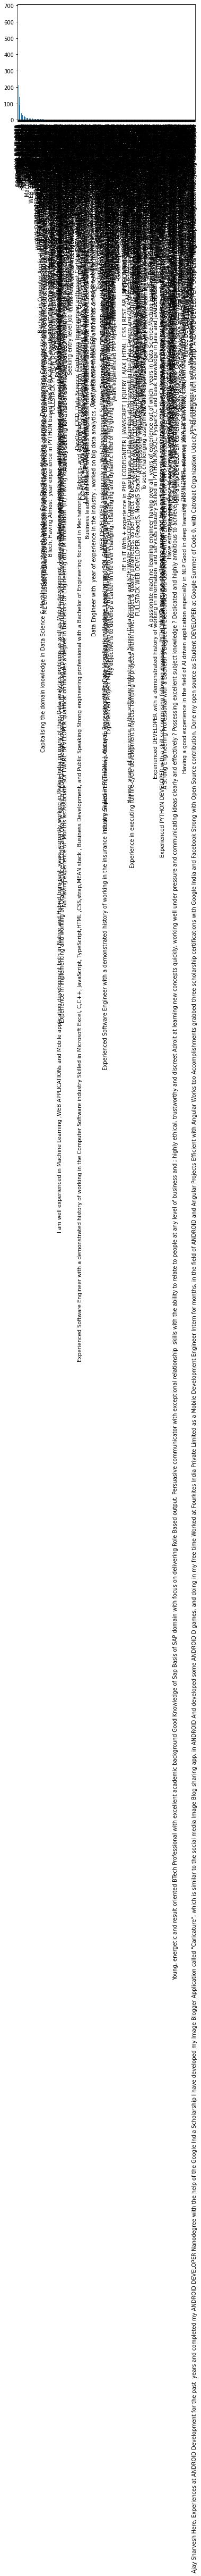

In [ ]:
df.Job_Roles.value_counts().plot(kind='bar')
plt.show()

In [ ]:
df['Job_Roles'].unique().tolist()

['JAVA DEVELOPER',
 'SOFTWARE DEVELOPER',
 'WEB DEVELOPER',
 'DEVELOPER',
 'BACKEND DEVELOPER',
 'FRONTEND DEVELOPER',
 'ANDROID DEVELOPER',
 'DATABASE DESIGNER',
 'FULLSTACK DEVELOPER',
 'PYTHON DEVELOPER',
 'PHP DEVELOPER',
 '.NET DEVELOPER',
 'IOT DEVELOPER',
 'DATA ANALYST',
 'COMMUNICATION ENGINEER',
 'UI DEVELOPER',
 'CLOUD DEVELOPER',
 'ML DEVELOPER',
 'IOS DEVELOPER']

In [ ]:
df = df.replace(to_replace = np.nan, value ='N') 

In [ ]:
df.head(50)

,Job_Roles,Skills_1,Skills_2,Skills_3,Skills_4,Skills_5,Skills_6,Skills_7,Skills_8,Skills_9,Skills_10,Skills_11,Skills_12,Skills_13,Skills_14,Skills_15,Skills_16,Skills_17,Skills_18,Skills_19,Skills_20,Skills_21,Skills_22,Skills_23
0,12,159,176,188,55,56,130,56,341,194,76,75,98,83,65,54,48,34,24,17,8,4,2,0
1,16,86,168,174,116,231,126,43,218,89,126,151,60,120,83,21,9,24,2,17,8,4,2,0
2,12,117,138,318,342,172,154,267,206,127,130,109,98,83,65,54,48,34,24,17,8,4,2,0
3,18,128,33,217,175,181,239,48,232,162,40,156,57,83,65,54,48,34,24,17,8,4,2,0
4,12,159,158,157,356,142,209,122,111,74,189,68,95,83,65,54,48,34,24,17,8,4,2,0
5,7,62,139,170,138,237,212,169,157,127,130,109,98,83,65,54,48,34,24,17,8,4,2,0
6,12,324,367,386,233,237,212,169,157,127,130,109,98,83,65,54,48,34,24,17,8,4,2,0
7,12,117,155,318,139,160,212,169,157,127,130,109,98,83,65,54,48,34,24,17,8,4,2,0
8,12,273,199,461,142,232,212,169,157,127,130,109,98,83,65,54,48,34,24,17,8,4,2,0
9,2,39,247,33,39,45,449,267,94,40,88,11,171,83,65,54,48,34,24,17,8,4,2,0


In [ ]:
df.apply(lambda x: x.astype(str).str.upper())

,Job_Roles,Skills
0,JAVA DEVELOPER,"JAVA, JSP, JAVASCRIPT, C, C++, HTML , CSS, STR..."
1,SOFTWARE DEVELOPER,"CORE JAVA, JEE,ECLIPSE, MYECLIPSE,HTML , CSS, ..."
2,JAVA DEVELOPER,"ECLIPSE, HIBERNATE, SPRING, STRAP, JSON, J..."
3,WEB DEVELOPER,"GIT, ANGULAR , MAVEN, JAVA, JENKINS, PCF ..."
4,JAVA DEVELOPER,"JAVA, JEE, HIBERNATE, SPRING, HTML , MYSQ..."
...,...,...
3333,DATA ANALYST,"PYTHON , DATA SCIENCE , MACHINE LEARNING , ..."
3334,ML DEVELOPER,"PYTHON, DJANGO, ML"
3335,ML DEVELOPER,"MACHINE LEARNING, PATTERN RECOGNITION, APACH..."
3336,ML DEVELOPER,"PYTHON , ALGORITHM , C++ , DEEP LEARNING , ..."


In [ ]:
df['Skills_1'] = df['Skills_1'].astype(int)

ValueError: ignored

In [ ]:
df["skill_1","skill_2",'skill_3','skill_4','skill_5','skill_6','skill_7','skill_8','skill_9','skill_10','skill_11',
    'skill_12','skill_13','skill_14','skill_15','skill_16','skill_17','skill_18','skill_19','skill_20'] = 
    df["skill_1","skill_2",'skill_3','skill_4','skill_5','skill_6','skill_7','skill_8','skill_9','skill_10','skill_11',
    'skill_12','skill_13','skill_14','skill_15','skill_16','skill_17','skill_18','skill_19','skill_20'].str.upper()
df.head()

SyntaxError: ignored

In [ ]:
df1 = df["Skills"].str.split(",",expand=True)

df1.rename(columns={0:"skill_1",1:"skill_2",2:'skill_3',3:'skill_4',4:'skill_5',5:'skill_6',6:'skill_7',7:'skill_8',8:'skill_9',9:'skill_10',10:'skill_11',11:'skill_12',12:'skill_13',13:'skill_14',14:'skill_15',15:'skill_16',16:'skill_17',17:'skill_18',18:'skill_19',19:'skill_20'})

,skill_1,skill_2,skill_3,skill_4,skill_5,skill_6,skill_7,skill_8,skill_9,skill_10,skill_11,skill_12,skill_13,skill_14,skill_15,skill_16,skill_17,skill_18,skill_19,skill_20
0,JAVA,JSP,JAVASCRIPT,C,C++,HTML,CSS,STRAP,SPRING,HIBERNATE,JEE,None,None,None,None,None,None,None,None,None
1,CORE JAVA,JEE,ECLIPSE,MYECLIPSE,HTML,CSS,STRAP,JAVASCRIPT,MYSQL,SPRING,HIBERNATE,TOMCAT,REST,GIT,BITBUCKET,JSON,AJAX,None,None,None
2,ECLIPSE,HIBERNATE,SPRING,STRAP,JSON,JAVA,SPRING,REST,None,None,None,None,None,None,None,None,None,None,None,None
3,GIT,ANGULAR,MAVEN,JAVA,JENKINS,PCF CLOUD,SPRING,REST,CONTRACT TESTING,GRADLE,None,None,None,None,None,None,None,None,None,None
4,JAVA,JEE,HIBERNATE,SPRING,HTML,MYSQL,JAVA,JEE,HIBERNATE,TOMCAT,HTML,MYSQL,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,PYTHON,DATA SCIENCE,MACHINE LEARNING,DEEP LEARNING,NLP,DATA ANALYTICS,TABLEAU,AWS,GIT,DATA VISUALIZATION,SQL,COMPUTER VISION,None,None,None,None,None,None,None,None
3334,PYTHON,DJANGO,ML,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3335,MACHINE LEARNING,PATTERN RECOGNITION,APACHE SPARK,OBJECT ORIENTED,OBJECT ORIENTED,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3336,PYTHON,ALGORITHM,C++,DEEP LEARNING,EXCHANGE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
df[["skill_1","skill_2",'skill_3','skill_4','skill_5','skill_6','skill_7','skill_8','skill_9','skill_10','skill_11',
    'skill_12','skill_13','skill_14','skill_15','skill_16','skill_17','skill_18','skill_19','skill_20']]=  df["Skills"].str.split(",",expand=True)
df


,Job_Roles,Skills,skill_1,skill_2,skill_3,skill_4,skill_5,skill_6,skill_7,skill_8,skill_9,skill_10,skill_11,skill_12,skill_13,skill_14,skill_15,skill_16,skill_17,skill_18,skill_19,skill_20
0,JAVA DEVELOPER,"JAVA, JSP, JAVASCRIPT, C, C++, HTML , CSS, STR...",JAVA,JSP,JAVASCRIPT,C,C++,HTML,CSS,STRAP,SPRING,HIBERNATE,JEE,None,None,None,None,None,None,None,None,None
1,SOFTWARE DEVELOPER,"CORE JAVA, JEE,ECLIPSE, MYECLIPSE,HTML , CSS, ...",CORE JAVA,JEE,ECLIPSE,MYECLIPSE,HTML,CSS,STRAP,JAVASCRIPT,MYSQL,SPRING,HIBERNATE,TOMCAT,REST,GIT,BITBUCKET,JSON,AJAX,None,None,None
2,JAVA DEVELOPER,"ECLIPSE, HIBERNATE, SPRING, STRAP, JSON, J...",ECLIPSE,HIBERNATE,SPRING,STRAP,JSON,JAVA,SPRING,REST,None,None,None,None,None,None,None,None,None,None,None,None
3,WEB DEVELOPER,"GIT, ANGULAR , MAVEN, JAVA, JENKINS, PCF ...",GIT,ANGULAR,MAVEN,JAVA,JENKINS,PCF CLOUD,SPRING,REST,CONTRACT TESTING,GRADLE,None,None,None,None,None,None,None,None,None,None
4,JAVA DEVELOPER,"JAVA, JEE, HIBERNATE, SPRING, HTML , MYSQ...",JAVA,JEE,HIBERNATE,SPRING,HTML,MYSQL,JAVA,JEE,HIBERNATE,TOMCAT,HTML,MYSQL,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,DATA ANALYST,"PYTHON , DATA SCIENCE , MACHINE LEARNING , ...",PYTHON,DATA SCIENCE,MACHINE LEARNING,DEEP LEARNING,NLP,DATA ANALYTICS,TABLEAU,AWS,GIT,DATA VISUALIZATION,SQL,COMPUTER VISION,None,None,None,None,None,None,None,None
3334,ML DEVELOPER,"PYTHON, DJANGO, ML",PYTHON,DJANGO,ML,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3335,ML DEVELOPER,"MACHINE LEARNING, PATTERN RECOGNITION, APACH...",MACHINE LEARNING,PATTERN RECOGNITION,APACHE SPARK,OBJECT ORIENTED,OBJECT ORIENTED,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3336,ML DEVELOPER,"PYTHON , ALGORITHM , C++ , DEEP LEARNING , ...",PYTHON,ALGORITHM,C++,DEEP LEARNING,EXCHANGE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
df.drop(["Skills"], axis=1, inplace = True)


In [ ]:
df.head()

,Job_Roles,Skills
0,JAVA DEVELOPER,"Java, Jsp, Javascript, C, C++, HtML , Css, str..."
1,SOFTWARE DEVELOPER,"Core Java, JEE,Eclipse, MyEclipse,HTML , CSS, ..."
2,JAVA DEVELOPER,"ECLIPSE, HIBERNATE, SPRING, STRAP, JSON, J..."
3,WEB DEVELOPER,"GIT, Angular , MAVEN, Java, Jenkins, PCF ..."
4,JAVA DEVELOPER,"Java, JEE, Hibernate, Spring, HTML , MySQ..."


In [ ]:
df = df.replace(to_replace = np.nan, value ='N') 


In [ ]:
df['skill_1'] = df['skill_1'].astype(int)

KeyError: ignored

In [ ]:

files.download('job_role_F.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.corr()
df

,Job_Roles,Skills_1,Skills_2,Skills_3,Skills_4,Skills_5,Skills_6,Skills_7,Skills_8,Skills_9,Skills_10,Skills_11,Skills_12,Skills_13,Skills_14,Skills_15,Skills_16,Skills_17,Skills_18,Skills_19,Skills_20,Skills_21,Skills_22,Skills_23
0,JAVA DEVELOPER,Java,Jsp,Javascript,C,C++,HtML,Css,strap,Spring,Hibernate,JEe,N,N,N,N,N,N,N,N,N,N,N,N
1,SOFTWARE DEVELOPER,Core,Java,JEE,Eclipse,MyEclipse,HTML,CSS,STRAP,Javascript,MySQL,Spring,Hibernate,Tomcat,Rest,Git,Bitbucket,Json,Ajax,N,N,N,N,N
2,JAVA DEVELOPER,ECLIPSE,HIBERNATE,SPRING,STRAP,JSON,Java,Spring,Rest,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
3,WEB DEVELOPER,GIT,Angular,MAVEN,Java,Jenkins,PCF,Cloud,Spring,REST,Contract,Testing,Gradle,N,N,N,N,N,N,N,N,N,N,N
4,JAVA DEVELOPER,Java,JEE,Hibernate,Spring,HTML,MySQL,Java,JEE,Hibernate,Tomcat,HTML,MySQL,N,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,DATA ANALYST,Python,Data,Science,Machine,Learning,Deep,Learning,NLP,Data,Analytics,Tableau,AWS,Git,Data,Visualization,SQL,Computer,Vision,N,N,N,N,N
3333,ML DEVELOPER,Python,Django,ML,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
3334,ML DEVELOPER,MACHINE,LEARNING,PATTERN,RECOGNITION,APACHE,SPARK,OBJECT,ORIENTED,OBJECT,ORIENTED,N,N,N,N,N,N,N,N,N,N,N,N,N
3335,ML DEVELOPER,PYTHON,ALGORITHM,C++,DEEP,LEARNING,EXCHANGE,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


In [ ]:
df

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.0%')

ValueError: ignored

In [ ]:
#transform non-numerical into numerical
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == np.number:
      continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [ ]:
df.head()

,Job_Roles,Skills
0,342,2257
1,515,1118
2,342,1429
3,661,1540
4,342,2189


In [ ]:
x = df.iloc[:, 1:df.shape[1]].values
y = df.iloc[:,0].values


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy', random_state = 0)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
forest.score(x_train, y_train)*100

88.89332800639232

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, forest.predict(x_test))

print(cm)
print('Model Accuracy = {}')

[[13  0  0  0  0  0  3  3  2  1  0  0  0  2  0  1  3  0  2]
 [ 0 30  1  0  0  1  1  5  0  2  0  1  2  0  0  1  3  1  3]
 [ 1  0  2  0  0  0  2  2  5  2  0  0  3  2  0  3  0  1  2]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  2  0  2  0  0  0  0  1  1  1  2  1  0  0]
 [ 1  0  3  2  0  0 16  4  1  0  1  0  4  1  4  4  6  1  5]
 [ 0  2  0  0  0  0  4 14  3  2  1  0  6  1  6  4  4  1  4]
 [ 0  1  2  0  0  0  4  1 15  1  0  0  6  0  6  0  4  1 14]
 [ 1  0  2  0  0  0  3  4  2  6  0  0  3  0  1  0  1  0  3]
 [ 1  0  1  0  0  0  0  0  0  0  4  0  0  0  0  0  1  0  0]
 [ 2  0  1  0  0  3  1  2  1  0  1  4  1  1  0  1  0  0  2]
 [ 3  7  1  0  0  0  5  5  4  5  0  1 57  0  5  1 10  3  9]
 [ 0  1  0  0  0  1  3  3  1  0  0  0  1  8  0  2  2  0  1]
 [ 1  1  2  0  0  0  3  3  5  2  0  0  4  0 54  1  8  3 13]
 [ 0  0  1  0  0  0  5  7  3  1  0  0  1  1  1 23  4  1  2]
 [ 3  4  1  0  0  0  6  5  3  2  0  1 10

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:

lr=LogisticRegression()
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
supvm=SVC()
knn=KNeighborsClassifier(n_neighbors=5)
gnb=GaussianNB()

In [ ]:
y=df["Job_Roles"]

In [ ]:
X=df.drop("Job_Roles",axis=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
df.head()

,Job_Roles,Skills
0,11,291
1,14,100
2,11,136
3,16,171
4,11,267


In [ ]:
for a,b in zip([lr,dt,rm,supvm,knn,gnb],["Logistic Regression","Decision Tree","Random Forest","Support Vector Machine","K Nearest Neighbours","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[Logistic Regression] training data accuracy is : 0.414474
[Logistic Regression] test data accuracy is : 0.392157
[Decision Tree] training data accuracy is : 0.950658
[Decision Tree] test data accuracy is : 0.313725
[Random Forest] training data accuracy is : 0.950658
[Random Forest] test data accuracy is : 0.313725
[Support Vector Machine] training data accuracy is : 0.414474
[Support Vector Machine] test data accuracy is : 0.392157
[K Nearest Neighbours] training data accuracy is : 0.536184
[K Nearest Neighbours] test data accuracy is : 0.303922
[Naive Bayes] training data accuracy is : 0.434211
[Naive Bayes] test data accuracy is : 0.392157


In [ ]:
l=df["Skills"].tolist()
s=""
m=[]
for i in range(0,len(l)):
    for char in l[i]:
        if ord(char) >= 65 and ord(char) <= 90:
            s=s+char
        elif ord(char) >= 97 and ord(char) <= 122:
            s=s+char
        else:
            print(s,end=" ")
            m.append(s)
            s=""

  JAVA    JSP    JAVASCRIPT    C    C      HTML    CSS    STRAP    SPRING    HIBERNATE     JEE    CORE JAVA    JEE   ECLIPSE    MYECLIPSE   HTML    CSS    STRAP   JAVASCRIPT   MYSQL     SPRING     HIBERNATE     TOMCAT    REST    GIT    BITBUCKET   JSON    AJAX    ECLIPSE     HIBERNATE     SPRING     STRAP     JSON    JAVA    SPRING    REST    GIT     ANGULAR      MAVEN     JAVA     JENKINS     PCF CLOUD     SPRING     REST     CONTRACT TESTING     GRADLE    JAVA     JEE     HIBERNATE     SPRING     HTML     MYSQL     JAVA     JEE     HIBERNATE     TOMCAT     HTML    MYSQL    C       HTML     JAVA     HIBERNATE    JAVA    JAVASCRIPT    AJAX    ECLIPSE     JAVA     SPRING     HTML     JAVASCRIPT    SPRING MVC     SPRING      HIBERNATE     MYSQL    ADOBE PHOTOSHOP    AJAX    APACHE    BACK END     STRAP    SPRING     HIBERNATE    CORE JAVA     ADVANCE JAVA    S     HTML     JEE     JQUERY     SPRING     SPRING     JAVA     CSS    ECLIPSE     JEE     JAVA     HIBERNATE     SPRING    CORE J